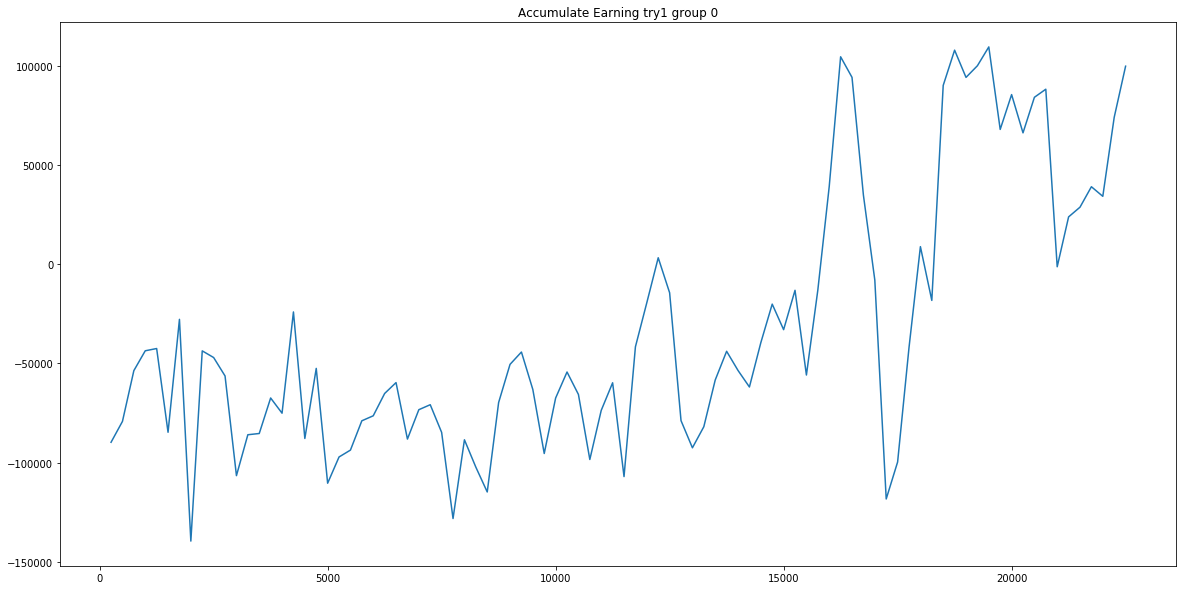

In [5]:
#%matplotlib inline
import importlib
import Eval_CC_ana as ana
importlib.reload(ana)
ana.plot_1_experiment(system_name="try1", Eval_Group_idx=0)

try1 0 max 5 ET and acc_earn:
19500 109697.04######18750 108055.13######16250 104715.70######19250 100193.98######22500 99964.91######

try1 1 max 5 ET and acc_earn:
19750 160264.21######19250 140191.17######22250 110855.14######20000 103136.18######19000 95960.84######

try1 2 max 5 ET and acc_earn:
21500 192019.53######18750 167362.01######21750 155571.13######19500 150183.51######19000 142068.65######

try1 3 max 5 ET and acc_earn:
20750 205799.21######19500 178298.16######2750 176555.04######18000 169178.68######13750 160486.56######

location gruop idx  0
19500 109697.04
18750 108055.13
16250 104715.70
19250 100193.98
16500 94332.50
19000 94316.85
18500 90273.56
location gruop idx  1
19750 160264.21
19250 140191.17
19000 95960.84
12500 89399.22
17000 83723.42
9250 80240.38
2250 76404.72
location gruop idx  2
18750 167362.01
19500 150183.51
19000 142068.65
19250 125230.08
19750 118516.61
18500 118471.87
location gruop idx  3
19500 178298.16
2750 176555.04
18000 169178.68
13750 1604

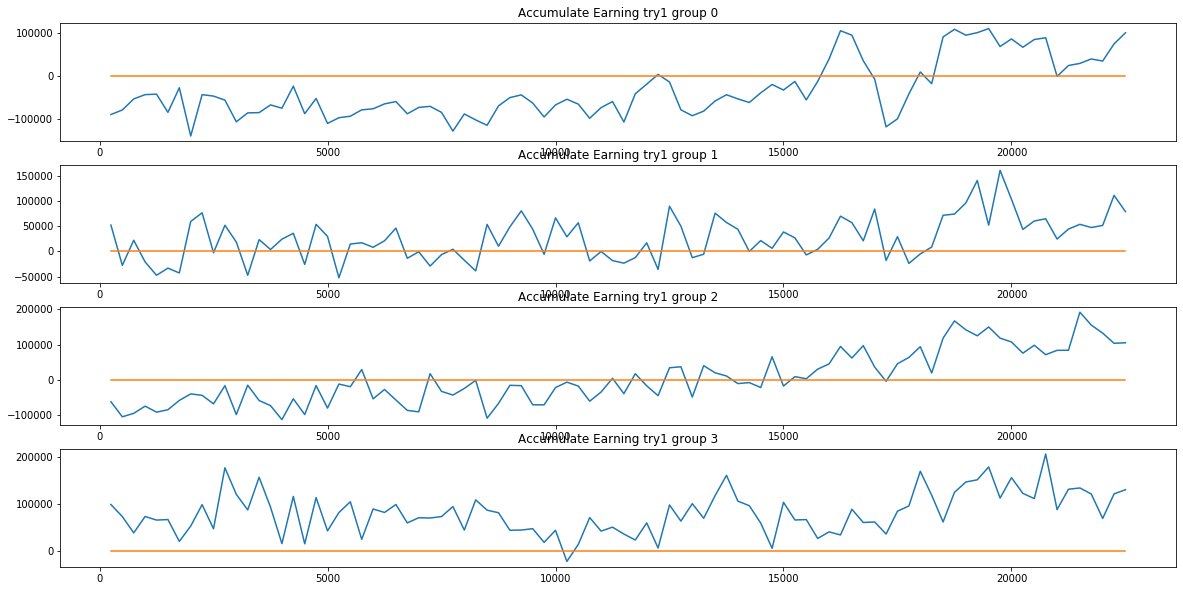

In [3]:
import importlib
import Eval_CC_ana as ana
importlib.reload(ana)

system_names__group_idxs= [["try1",0],
                          ["try1",1],
                          ["try1",2],
                          ["try1",3]]
ana.plot_multi_experiments(system_names__group_idxs,ET_tb_entropy_threadhold=20000)

sell_earn statis:
count     427.000000
mean      234.646323
std      1395.553084
min     -6067.540000
25%      -450.830000
50%        89.280000
75%       936.195000
max      5002.220000
Name: ResultM, dtype: float64
Pluse Count 233.0 Minus count 194.0 Zero count 0.0


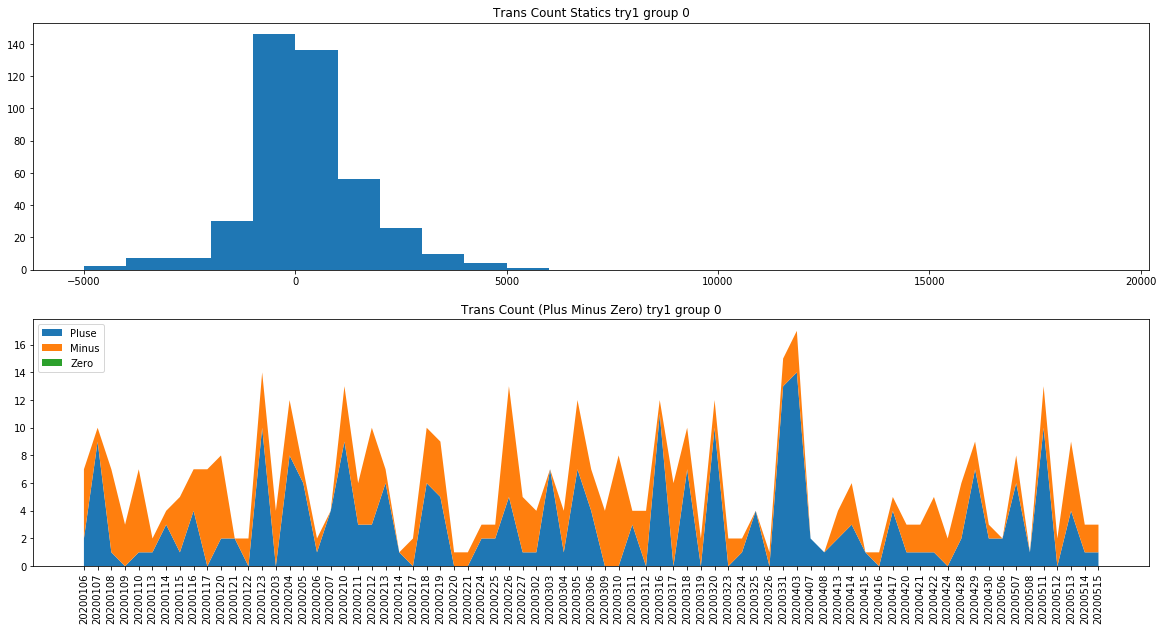

In [17]:
import importlib
import Eval_CC_ana as ana
importlib.reload(ana)

ana.ana_transaction_1ET_on_count(system_name="try1",Eval_Group_idx=0,ET=19250,flag_old=False)

In [4]:
import importlib
import Eval_CC_ana as ana
importlib.reload(ana)

ana.ana_transaction_1ET_on_stock(system_name="try1",Eval_Group_idx=0,ET=19250,flag_old=False)

Index(['TransIDI', 'Holding_Gu', 'Holding_Invest', 'Holding_HRatio',
       'Holding_NPrice', 'Buy_Times', 'Buy_Invest', 'Buy_NPrice',
       'Sell_Return', 'Sell_Earn', 'Sell_NPrice', 'Tinpai_huaizhang', 'DateI',
       'StockI', 'Eval_Profit', 'AcutalAction', 'StockS'],
      dtype='object')
+-----------+------------+----------+
| totalEarn | Sell_count |  Stock   |
+-----------+------------+----------+
|  -6011.33 |    2.00    | SH600570 |
|  -5401.47 |    2.00    | SZ000656 |
|  -5130.31 |    4.00    | SH600498 |
|  -4583.88 |    2.00    | SZ300628 |
|  -4114.22 |    4.00    | SZ000063 |
|  -3987.92 |    2.00    | SH601012 |
|  -3901.87 |    2.00    | SH600332 |
|  -3728.66 |    2.00    | SZ002463 |
|  -3696.52 |    3.00    | SZ300136 |
|  -3410.92 |    2.00    | SH601816 |
|  -3096.03 |    1.00    | SH601919 |
|  -2400.06 |    1.00    | SZ002271 |
|  -2332.70 |    5.00    | SH601698 |
|  -2311.24 |    2.00    | SH600588 |
|  -2308.59 |    2.00    | SH600018 |
|  -2001.47 |    2.00

In [5]:
import importlib
import Eval_CC_ana as ana
importlib.reload(ana)

ana.ana_trans_1ET_1Stock(system_name="try1",Eval_Group_idx=0,ET=19250,Stock="SH601698",flag_old=False)

+--------------+------------+-------------+----------------+-----------+-------------+
| AcutalAction | Buy_Invest | Eval_Profit | Holding_Invest | Sell_Earn | Sell_Return |
+--------------+------------+-------------+----------------+-----------+-------------+
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     nan      |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |      0.00      |    0.00   |     0.00    |
|     1.00     |    0.00    |     0.00    |

sum 100132.02
0 5709.04
1 3977.76
2 4103.98
3 7113.62
4 14348.80
5 1979.54
6 -4388.73
7 9692.52
8 -12549.32
9 14138.48
10 6263.28
11 32727.00
12 689.84
13 3535.80
14 -3351.98
15 14180.75
16 3144.11
17 -1182.47
earn day 39 loss day 44  balance day 3


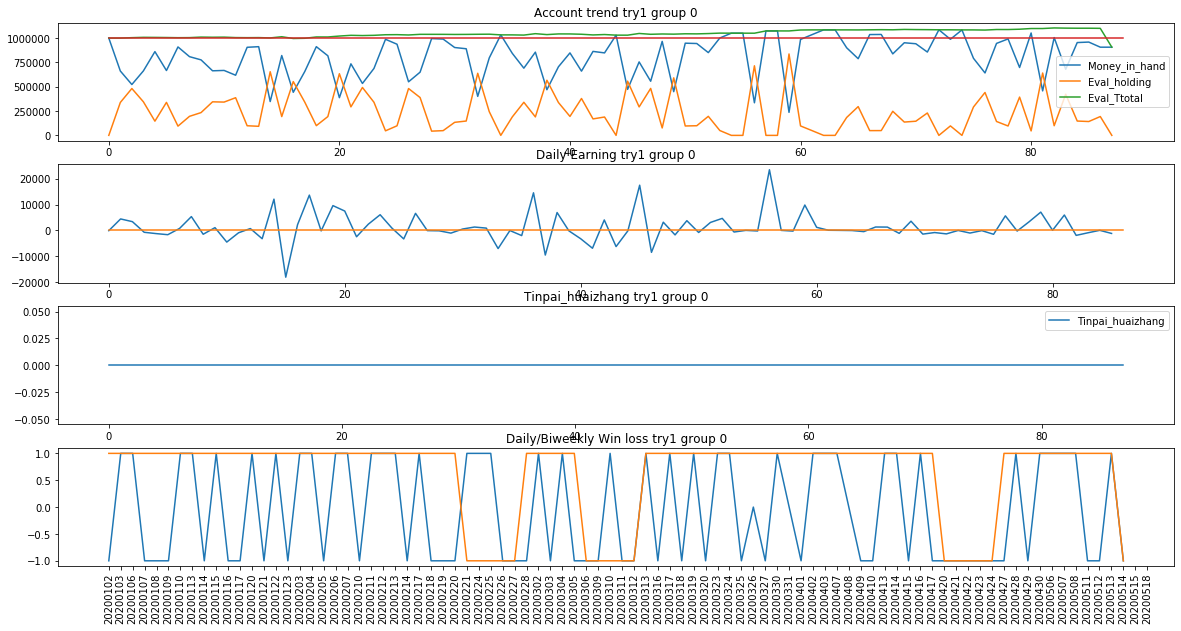

In [1]:
import importlib
import Eval_CC_ana as ana
importlib.reload(ana)

ana.ana_earn(system_name="try1",Eval_Group_idx=0,ET=19250,flag_old=False)

Index(['index', 'DateI', 'C_not_buy_due_limit', 'C_not_buy_due_low_profit',
       'C_sell_due_low_profit', 'C_multibuy'],
      dtype='object')


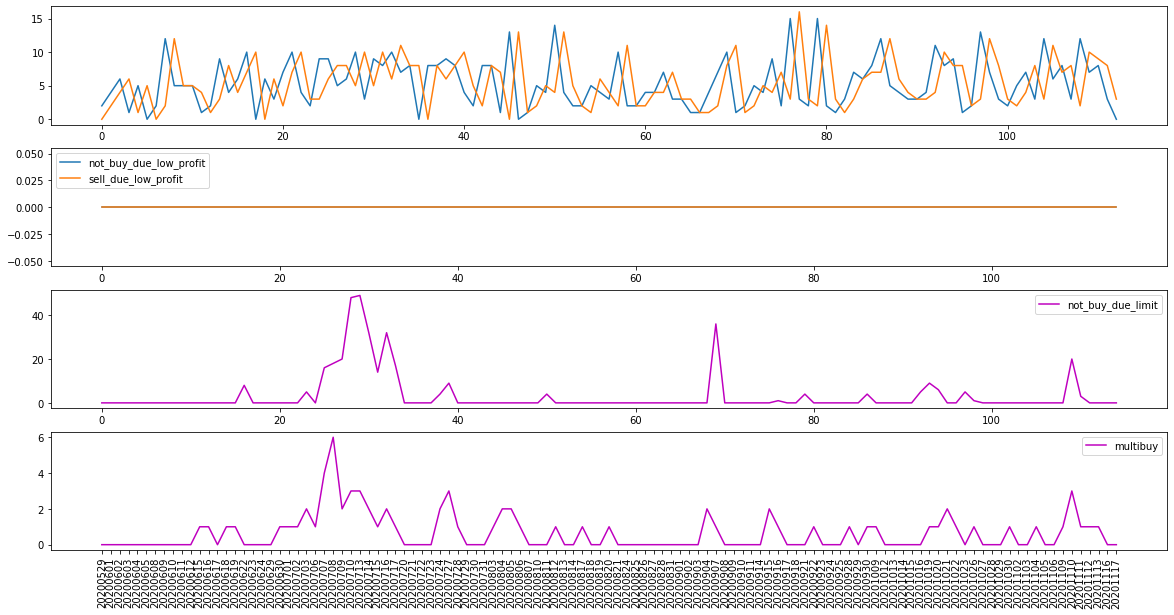

In [28]:
import importlib
import Eval_CC_ana as ana
importlib.reload(ana)

dfad=ana.ana_action(system_name="try1",Eval_Group_idx=3,ET=19250,flag_old=False)
print (dfad.columns)